<a href="https://colab.research.google.com/github/Bmo411/Deeplearning/blob/main/cfar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Denoising Autoencoder**

un denosing autoencoder es un tipo de autoencoder hecho para remover el ruido de una de una entrada modificada, este autoncoder se entrena para ser capaz de recuperar los datos de esta entrada a pesar del ruido que se le agrega.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam

# Define latent dimension and input shape
latent_dim = 250
input_shape = (32, 32, 3)

def build_encoder(input_shape, latent_dim):
    inputs = Input(shape=input_shape)
    # TODO: Add a Conv2D layer with 16 filters, kernel size (3,3), activation 'relu', strides=1, and padding 'same'
    x = Conv2D(16, kernel_size=(4, 4), activation='relu',padding='same' ,input_shape=(32, 32, 3), strides=1)(inputs)
    x=MaxPooling2D(pool_size=(2,2))(x)
    # TODO: Add a Conv2D layer with 8 filters, kernel size (3,3), activation 'relu', strides=1, and padding 'same'
    x=Conv2D(8, kernel_size=(4, 4), activation='relu',padding='same', strides=1)(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    # TODO: Save the shape before flattening for use in the decoder (e.g., shape_before_flattening = ?)
    shape_before_flattening=x.shape
    # TODO: Flatten the output
    x = Flatten()(x)
    # TODO: Add a Dense layer to produce the latent vector of dimension latent_dim
    latent = Dense(latent_dim)(x)
    # (assign the output of this Dense layer to a variable named "latent")
    encoder = Model(inputs, latent, name="encoder")
    return encoder, shape_before_flattening

def build_decoder(latent_dim, shape_before_flattening):
    latent_inputs = Input(shape=(latent_dim,))

    # TODO: Add a Dense layer to expand the latent vector back to the size of the flattened feature map
    x=Dense(np.prod(shape_before_flattening[1:]))(latent_inputs)
    # TODO: Reshape the expanded vector back to the shape before flattening
    x=Reshape(shape_before_flattening[1:])(x)
    # TODO: Add a Conv2DTranspose layer with 8 filters, kernel size (3,3), activation 'relu', strides=1, and padding 'same'
    x=Conv2DTranspose(8, kernel_size=(4, 4), activation='relu',padding='same', strides=2)(x)
    # TODO: Add a Conv2DTranspose layer with 16 filters, kernel size (3,3), activation 'relu', strides=1, and padding 'same'
    x = Conv2DTranspose(16, kernel_size=(4, 4), activation='relu',padding='same', strides=2)(x)
    # TODO: Add a final Conv2D layer with 3 filters, kernel size (1,1), activation 'sigmoid', and padding 'same'
    outputs = Conv2D(3, kernel_size=(1, 1), activation='sigmoid',padding='same', strides=1)(x)
    # (assign the output of this layer to a variable named "outputs")

    decoder = Model(latent_inputs, outputs, name="decoder")
    return decoder



In [ ]:
# Build encoder and decoder
encoder, shape_before_flattening = build_encoder(input_shape, latent_dim)
decoder = build_decoder(latent_dim, shape_before_flattening)

# Create the full autoencoder by connecting encoder and decoder
input_img = Input(shape=input_shape)
latent_repr = encoder(input_img)
reconstructed_img = decoder(latent_repr)
autoencoder = Model(input_img, reconstructed_img, name="autoencoder")

# TODO: Compile the autoencoder with an optimizer (e.g., Adam) and a loss function (e.g., 'binary_crossentropy')
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_47 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 250)                 │         131,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 32, 32, 3)           │         131,659 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,749 (1.00 MB)

 Trainable params: 262,749 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Load CIFAR-10 data and normalize pixel values to [0, 1]
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

In [ ]:
# train
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5286 - loss: 0.0433 - val_accuracy: 0.6271 - val_loss: 0.0140
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6313 - loss: 0.0127 - val_accuracy: 0.6175 - val_loss: 0.0113
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6404 - loss: 0.0105 - val_accuracy: 0.6406 - val_loss: 0.0098
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6468 - loss: 0.0094 - val_accuracy: 0.6558 - val_loss: 0.0090
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6502 - loss: 0.0088 - val_accuracy: 0.6634 - val_loss: 0.0084
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6633 - loss: 0.0082 - val_accuracy: 0.6860 - val_loss: 0.0081
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7007 - loss: 0.0076 - val_accuracy: 0.7181 - val_loss: 0.0073
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7193 - loss: 0.0071 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


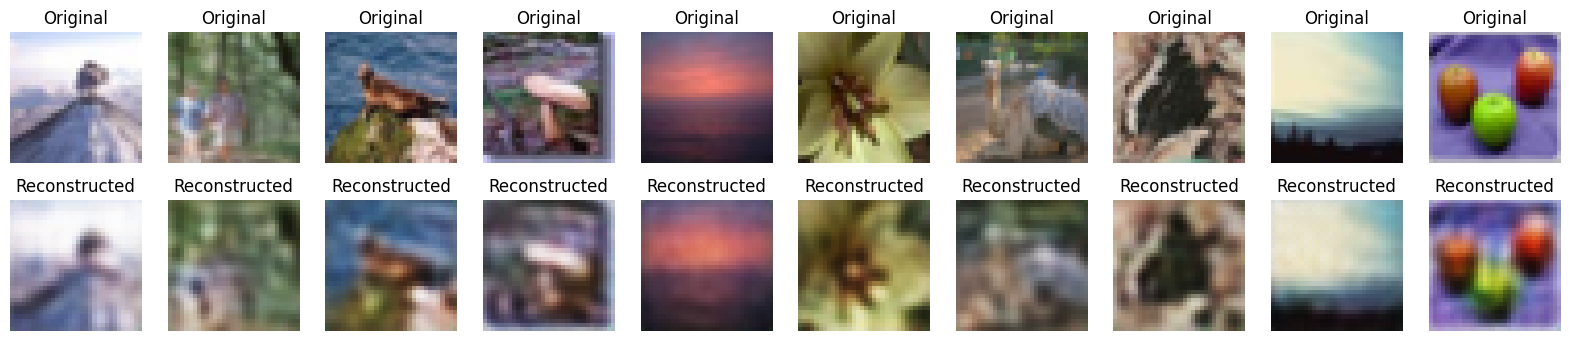

In [ ]:
# Reconstruct images from the test set
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images side by side
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()